<a href="https://colab.research.google.com/github/Francis-trillogy/tensorflow-examples/blob/main/Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# install and Import Depencies

# install and import depencies
# pip install -u tensorflow_datasets
from __future__ import absolute_import, division, print_function

In [63]:
# Import tensorflow and tensorflow datasets
import tensorflow as tf
import tensorflow_datasets as tdfs

In [64]:
# Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Improve progress bar display
import tqdm
import tqdm.auto
tqdm = tqdm.auto.tqdm

In [66]:
# loading Fashion MNISt dataset
dataset, metadata = tdfs.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [67]:
# creating string names user can be able identify
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [68]:
# Explore data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples : {}".format(num_train_examples))
print("Number of testing examples : {}".format(num_test_examples))

Number of training examples : 60000
Number of testing examples : 10000


In [69]:
# Preprocess Data
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /=255
  return images, labels

In [70]:
# The map function applies map function to each element of in the train and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

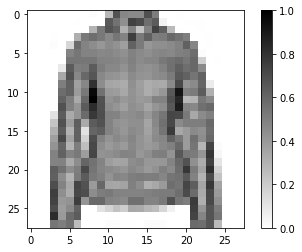

In [71]:
# Explore the processed data
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape(28, 28)
# Plot the image - voila a piece of fashion clothing
plt.figure()

plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

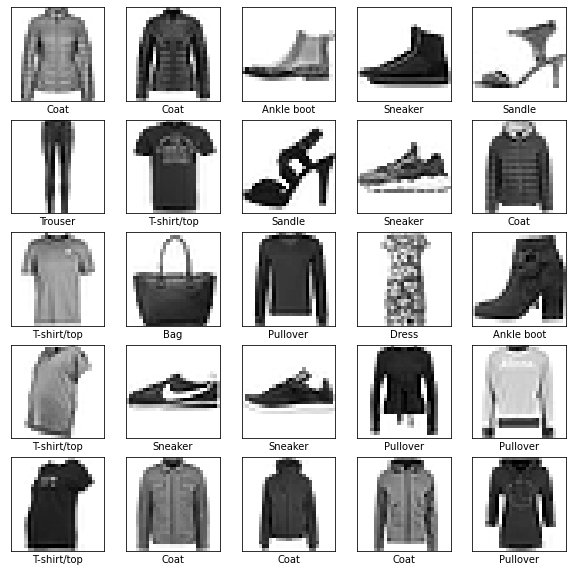

In [72]:
# Display 25 images from training set and display class_name below each image
plt.figure(figsize = (10,10))
i = 0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape(28,28)
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

In [73]:
# Build model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

In [74]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics = ['accuracy'])

In [75]:
# Train model
BATCH_SIZE =32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [76]:
model.fit(train_dataset, epochs= 5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 15s 4ms/step - loss: 0.6245 - accuracy: 0.7849
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3864 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3424 - accuracy: 0.8755
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3118 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3016 - accuracy: 0.8903


In [77]:
# Evaluate Accuracy
test_loss, test_accuracy = model.evaluate(test_dataset, steps= math.ceil(num_test_examples))
print('Accuracy on test_datset : {}'.format(test_accuracy))

  311/10000 [..............................] - ETA: 1:00 - loss: 0.3616 - accuracy: 0.8742WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10000 batches). You may need to use the repeat() function when building your dataset.


10000/10000 [==============================] - 2s 196us/step - loss: 0.3627 - accuracy: 0.8738
Accuracy on test_datset : 0.8737999796867371


In [78]:
# Make Predictions
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [79]:
predictions.shape

(32, 10)

In [80]:
predictions[0]

array([2.82405235e-05, 1.24908672e-06, 1.87583398e-02, 3.40385391e-08,
       9.75564957e-01, 6.05413220e-11, 5.61133074e-03, 5.28395383e-11,
       3.58122343e-05, 1.23012835e-08], dtype=float32)

In [81]:
np.argmax(predictions[0])

4

In [82]:
test_labels[0]

4